In [ ]:
## importing dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_PATH="/content/drive/MyDrive/Kuliah Teknik Informatika/Semester 5C/CAPSTONE PROJEK/MODEL/Model_5/Images"

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Kuliah Teknik Informatika/Semester 5C/CAPSTONE PROJEK/MODEL/Model_5/Lisensi_fik.csv")
df.head()

,image name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,722,587,868,688
1,licensed_car1.jpeg,161,850,582,100
2,licensed_car2.jpeg,820,697,230,828
3,licensed_car3.jpeg,434,667,718,765
4,licensed_car4.jpeg,208,390,865,984


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import cv2
from keras.applications.vgg16 import VGG16
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
WIDTH=224
HEIGHT=224
CHANNEL=3

In [ ]:

model=Sequential()

model.add(VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4))
model.layers[-6].trainable = False

model.compile(optimizer='adam', loss="mse")

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 17,938,756
Trainable params: 3,224,068
Non

In [ ]:
### Training and validating model

train_datagen=image.ImageDataGenerator(rescale=1./255,zoom_range=0.1,validation_split=0.1)

train_generator = train_datagen.flow_from_dataframe(
    df,
    directory=IMAGE_PATH,
    x_col="image name",
    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],
    target_size=(WIDTH, HEIGHT),
    batch_size=32, 
    class_mode="raw",
    subset="training")

Found 604 validated image filenames.


In [ ]:
validation_generator = train_datagen.flow_from_dataframe(
    df,
    directory=IMAGE_PATH,
    x_col="image name",
    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],
    target_size=(WIDTH, HEIGHT),
    batch_size=32, 
    class_mode="raw",
    subset="validation")

Found 67 validated image filenames.


In [ ]:
STEP_SIZE_TRAIN = int(np.ceil(train_generator.n / train_generator.batch_size))
STEP_SIZE_VAL = int(np.ceil(validation_generator.n / validation_generator.batch_size))

print("Train step size and Batch size:", STEP_SIZE_TRAIN,train_generator.batch_size)
print("Validation step size:", STEP_SIZE_VAL)

train_generator.reset()
validation_generator.reset()

Train step size and Batch size: 19 32
Validation step size: 3


In [ ]:
history = model.fit_generator(train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VAL,
    epochs=40)

<ipython-input-11-82484855d4df>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/40
19/19 [==============================] - 357s 18s/step - loss: 193082.4688 - val_loss: 46054.6602
Epoch 2/40
19/19 [==============================] - 14s 741ms/step - loss: 34304.2734 - val_loss: 30946.3438
Epoch 3/40
19/19 [==============================] - 14s 745ms/step - loss: 25765.6289 - val_loss: 30953.2363
Epoch 4/40
19/19 [==============================] - 14s 746ms/step - loss: 23054.4824 - val_loss: 28780.6973
Epoch 5/40
19/19 [==============================] - 14s 745ms/step - loss: 21954.1113 - val_loss: 27793.2500
Epoch 6/40
19/19 [==============================] - 17s 895ms/step - loss: 20836.7812 - val_loss: 27429.8652
Epoch 7/40
19/19 [==============================] - 14s 738ms/step - loss: 19571.4258 - val_loss: 26288.4238
Epoch 8/40
19/19 [==============================] - 14s 745ms/step - loss: 17941.4258 - val_loss: 25524.0215
Epoch 9/40
19/19 [==============================] - 14s 744ms/step - loss: 15771.7832 - val_loss: 24668.8672
Epoch 10/40
19/19 [

In [ ]:
model.evaluate(validation_generator, steps=STEP_SIZE_VAL)

3/3 [==============================] - 2s 340ms/step - loss: 18364.6582


18364.658203125

In [ ]:
### save the model
model.save('/content/drive/MyDrive/Kuliah Teknik Informatika/Semester 5C/CAPSTONE PROJEK/MODEL/Model_5/best-model.h5')

In [ ]:
from keras.models import load_model
new_model=load_model('/content/drive/MyDrive/Kuliah Teknik Informatika/Semester 5C/CAPSTONE PROJEK/MODEL/Model_5/best-model.h5')

1/1 [==============================] - 1s 839ms/step


array([295.67282, 429.70364, 678.9363 , 594.81445], dtype=float32)

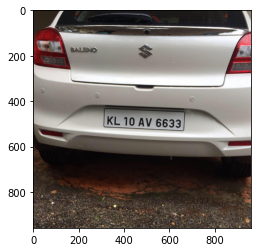

In [ ]:
img= cv2.resize(cv2.imread("/content/drive/MyDrive/Kuliah Teknik Informatika/Semester 5C/CAPSTONE PROJEK/MODEL/Model_5/Images/licensed_car95.jpeg")/255.0, dsize=(WIDTH, HEIGHT))
y_hat = new_model.predict(img.reshape(1,WIDTH,HEIGHT,3)).reshape(-1)
    
top_x, 	top_y = int(y_hat[0]),int(y_hat[1])
bottom_x, bottom_y = int(y_hat[2]),int(y_hat[3])
img_=cv2.imread('/content/drive/MyDrive/Kuliah Teknik Informatika/Semester 5C/CAPSTONE PROJEK/MODEL/Model_5/Images/licensed_car95.jpeg')
plt.imshow(cv2.cvtColor(img_,cv2.COLOR_BGR2RGB))
y_hat

295 678 429 594


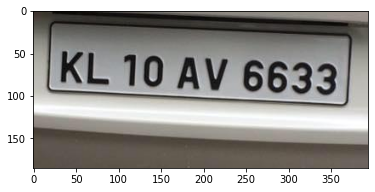

In [ ]:
cropped_img=img_[top_y-10:bottom_y+10,top_x-1:bottom_x+10]
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))
print(top_x,bottom_x,top_y,bottom_y)

# Character Extraction

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import easyocr
reader=easyocr.Reader(['en'])

In [ ]:
output = reader.readtext(cropped_img)
output

[([[27, 41], [368, 41], [368, 110], [27, 110]],
  'KL 10 AV 6633',
  0.5556771221536898)]

In [ ]:
text=""
for i in range(len(output)):
  text=text+output[i][-2]+" "

print("license Number of vehicle:",text)

license Number of vehicle: KL 10 AV 6633 


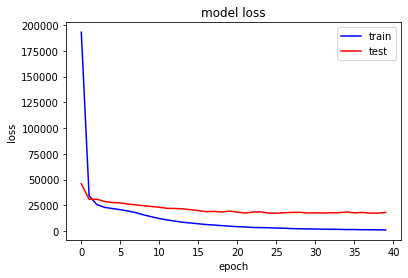

In [ ]:
# Plot the loss curves for training and validation 
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')